# <font color='#FFE15D'>**Week 7: Geometric Transformation**</font> 📐

## <span style="font-size: 0.9em;">🟥</span> **Import**


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cv2.__version__

'4.9.0'

## <span style="font-size: 0.9em;">🟥</span> **Section 1: from Scratch**

In [174]:
img = cv2.imread('data/t.jpg')

cv2.imshow('Example Image', img)
cv2.waitKey()
cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟧</span> **Rotate**

In [88]:
angle = 45

In [90]:
rad = np.deg2rad(angle)

rotation_matrix = np.array([
    [np.cos(rad), -np.sin(rad)],
    [np.sin(rad),  np.cos(rad)]
])


height, width = img.shape[:2]
center_x, center_y = width//2, height//2
print(center_x, center_y)

rot_img = np.zeros(img.shape, dtype=np.uint8)


for y in range(height):
    for x in range(width):
        xy_coords = np.array([[x - center_x], [y - center_y]])

        x_dst, y_dst = rotation_matrix @ xy_coords
        
        x_dst = int(np.round(x_dst + center_x))
        y_dst = int(np.round(y_dst + center_y))

        if (0 <= x_dst < width) and (0 <= y_dst < height):
            rot_img[y_dst, x_dst] = img[y, x]
        # break
    # break
        

cv2.imshow('Image', img)
cv2.imshow('Rotated Image', rot_img)
cv2.waitKey()
cv2.destroyAllWindows()

172 200


In [97]:
angle = 180
rad = np.deg2rad(angle)

rotation_matrix = np.array([
    [np.cos(rad), -np.sin(rad)],
    [np.sin(rad),  np.cos(rad)]
])

inv_rotation_matrix = np.linalg.inv(rotation_matrix)
# print(rotation_matrix)
# print(inv_rotation_matrix)


height, width = img.shape[:2]
center_x, center_y = width//2, height//2
print(center_x, center_y)

rot_img = np.zeros(img.shape, dtype=np.uint8)


for y in range(height):
    for x in range(width):
        xy_coords = np.array([[x - center_x], [y - center_y]])

        x_src, y_src = inv_rotation_matrix @ xy_coords
        
        x_src = int(np.round(x_src + center_x))
        y_src = int(np.round(y_src + center_y))

        if (0 <= x_src < width) and (0 <= y_src < height):
            rot_img[y, x] = img[y_src, x_src]
        # break
    # break
        

cv2.imshow('Image', img)
cv2.imshow('Rotated Image', rot_img)
cv2.waitKey()
cv2.destroyAllWindows()

172 200


#### <span style="font-size: 0.9em;">🟪</span> **Implement rotation using vectorization techniques**

#### <span style="font-size: 0.9em;">🟪</span> **Implement rotation so that the resulting image is larger than the input image**

<div style="font-size: 18pt;">
    
- Different modes of image rotation:
  2. Rotated Image with Same Size as Input
  3. Rotated Image Larger than Input (No Loss of Input Area)

</div>

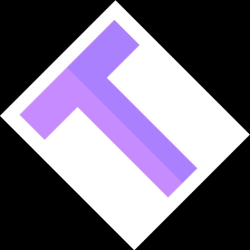

### <span style="font-size: 0.9em;">🟪</span> **Resize**

In [ ]:
a, b = 2, 2

### <span style="font-size: 0.9em;">🟪</span> **Flip**

### <span style="font-size: 0.9em;">🟪</span> **Skew**

In [ ]:
sx, sy = 2, 1

### <span style="font-size: 0.9em;">🟧</span> **Finding Unknow Transformation**

$$
\begin{bmatrix}
    x_1' \\
    y_1' \\
    x_2' \\
    y_2' \\
    \vdots \\
    x_n' \\
    y_n' 
\end{bmatrix} =
\begin{bmatrix}
    x_1 & y_1 & 0 & 0 \\
    0 & 0 & x_1 & y_1 \\
    x_2 & y_2 & 0 & 0 \\
    0 & 0 & x_2 & y_2 \\
    \vdots & \vdots & \vdots & \vdots \\
    x_n & y_n & 0 & 0 \\
    0 & 0 & x_n & y_n 
\end{bmatrix}
\begin{bmatrix}
    a \\
    b \\
    c \\
    d 
\end{bmatrix}
$$


In [153]:
src = np.load("data/src.npy")
dst = np.load("data/dst.npy")
print(src)
print()
print(dst)

[[ 28  28  28  28 101 101 101 101 370 370 370 370]
 [ 31 171 172 312  31 129 214 312 129 171 172 214]]

[[ 31 171 172 312  31 129 214 312 129 171 172 214]
 [ 28  28  28  28 101 101 101 101 370 370 370 370]]


In [173]:
Xp = dst.flatten(order='F')

A = np.zeros((src.shape[1]*2, 4))
A[::2, :2] = src.T
A[1::2, 2:] = src.T

T = np.linalg.inv(A.T @ A) @ A.T @ Xp
T = T.reshape((2, 2)).round()
T

array([[-0.,  1.],
       [ 1.,  0.]])

In [ ]:
np.linalg.lstsq()

## <span style="font-size: 0.9em;">🟥</span> **Section 2: Affine Transformation**

<div style="font-size: 20px;">

<p><b>Key Functions for Affine Transformations in OpenCV</b></p>

<ol>
    <li><strong><code>cv2.getAffineTransform()</code></strong>: Computes the 2x3 affine transformation matrix from three pairs of corresponding points.</li>
    <li><strong><code>cv2.warpAffine()</code></strong>: Applies an affine transformation to an image using the 2x3 transformation matrix.</li>
</ol>

</div>


### <span style="font-size: 0.9em;">🟧</span> **Unknown Transformation Matrix**

In [20]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

src_points = np.float32([[108, 522], [17, 283], [495, 362]])
dst_points = np.float32([[0, 0], [w-1, 0], [0, h-1]])

M = cv2.getAffineTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpAffine(img, M, (2*w, 2*h))

for p in src_points:
    cv2.circle(img, np.int32(p), 5, (0, 0, 244), -1)

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[-7.45798810e-01 -1.80390087e+00  1.02218253e+03]
 [ 1.48687099e+00 -5.66130795e-01  1.34938208e+02]]


In [23]:
src_points = np.float32([[108, 522], [17, 283], [495, 362]])

book_width = int(np.linalg.norm(src_points[0]-src_points[1], ord=2))
book_height = int(np.linalg.norm(src_points[0]-src_points[2], ord=2))
book_width, book_height, book_width/book_height

(255, 418, 0.6100478468899522)

In [25]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

src_points = np.float32([[108, 522], [17, 283], [495, 362]])
dst_points = np.float32([[0, 0], [book_width-1, 0], [0, book_height-1]])

M = cv2.getAffineTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpAffine(img, M, (w, h))

for p in src_points:
    cv2.circle(img, np.int32(p), 5, (0, 0, 244), -1)

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[-3.79625046e-01 -9.18218079e-01  5.20309342e+02]
 [ 9.30968772e-01 -3.54469282e-01  8.44883376e+01]]


### <span style="font-size: 0.9em;">🟧</span> **Known Transformation Matrix**

In [33]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

angle = 10
rad = np.deg2rad(angle)
rotation_matrix = np.array([
    [np.cos(rad), -np.sin(rad), 100],
    [np.sin(rad),  np.cos(rad), 100]
])

transformed_image = cv2.warpAffine(img, rotation_matrix, (w, h))

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

## <span style="font-size: 0.9em;">🟥</span> **Section 3: Related OpenCV Commands**

### <span style="font-size: 0.9em;">🟧</span> **Resize**

In [58]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

# dsize = (w // 2, h // 2)
# dsize = (2*w, 2*h)
dsize = (400, 100)
resized_image = cv2.resize(img, dsize, interpolation=cv2.INTER_LANCZOS4)

cv2.imshow("Original Image", img)
cv2.imshow("Resized Image", resized_image)
cv2.waitKey()
cv2.destroyAllWindows()

In [61]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

resized_image = cv2.resize(img, dsize=(0, 0), fx=0.5, fy=1.5)

cv2.imshow("Original Image", img)
cv2.imshow("Resized Image", resized_image)
cv2.waitKey()
cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟧</span> **Rotation**

In [71]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

center = (w//2, h//2)
angle = 45
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 2.0)
print(rotation_matrix)
rotated_image = cv2.warpAffine(img, rotation_matrix, (w, h))

cv2.imshow("Original Image", img)
cv2.imshow("Rotated Image", rotated_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[   1.41421356    1.41421356 -574.48650686]
 [  -1.41421356    1.41421356  215.62027432]]


### <span style="font-size: 0.9em;">🟧</span> **Flip**

In [75]:
img = cv2.imread("data/f.jpg")

flipped_image = cv2.flip(img, 1)

cv2.imshow("Original Image", img)
cv2.imshow("Flipped Image", flipped_image)
cv2.waitKey()
cv2.destroyAllWindows()

### <span style="font-size: 0.9em;">🟧</span> **Translation**

In [76]:
img = cv2.imread("data/f.jpg")
(h, w) = img.shape[:2]

tx, ty = 100, 50
translation_matrix = np.float32([
    [1, 0, tx], 
    [0, 1, ty]
])

translated_image = cv2.warpAffine(img, translation_matrix, (w, h))

cv2.imshow("Original Image", img)
cv2.imshow("Translated Image", translated_image)
cv2.waitKey()
cv2.destroyAllWindows()


### <span style="font-size: 0.9em;">🟧</span> **Skew**

In [79]:
img = cv2.imread("data/f.jpg")
(h, w) = img.shape[:2]

skew_factor = 0.5
skew_matrix = np.float32([
    [1, skew_factor, 0], 
    [0, 1,           0]
])

skewed_image = cv2.warpAffine(img, skew_matrix, (w + int(h * skew_factor), h))

cv2.imshow("Original Image", img)
cv2.imshow("Skewed Image", skewed_image)
cv2.waitKey()
cv2.destroyAllWindows()


## <span style="font-size: 0.9em;">🟥</span> **Challenge!**

In [86]:
img1 = cv2.imread("data/book-1.bmp")
img2 = cv2.imread("data/book-2.bmp")

cv2.imshow("Image 1", img1)
cv2.imshow("Image 2", img2)
cv2.waitKey()
cv2.destroyAllWindows()

In [91]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

src_points = np.float32([[108, 522], [17, 283], [495, 362]])
dst_points = np.float32([[0, 0], [w-1, 0], [0, h-1]])

M = cv2.getAffineTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpAffine(img, M, (w, h))

for p in src_points:
    cv2.circle(img, np.int32(p), 5, (0, 0, 244), -1)

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[-7.45798810e-01 -1.80390087e+00  1.02218253e+03]
 [ 1.48687099e+00 -5.66130795e-01  1.34938208e+02]]


In [92]:
img = cv2.imread("data/book-2.bmp")
(h, w) = img.shape[:2]

src_points = np.float32([[114, 95], [387, 94], [45, 586]])
dst_points = np.float32([[0, 0], [w-1, 0], [0, h-1]])

M = cv2.getAffineTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpAffine(img, M, (w, h))

for p in src_points:
    cv2.circle(img, np.int32(p), 5, (0, 0, 244), -1)

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[ 1.82878021e+00  2.56997626e-01 -2.32895719e+02]
 [ 4.97111380e-03  1.35711407e+00 -1.29492543e+02]]


## <span style="font-size: 0.9em;">🟥</span> **Section 4: Perspective Transform**

<div style="font-size: 20px;">

<ol>
    <li><strong><code>cv2.getPerspectiveTransform()</code></strong></li>
    <li><strong><code>cv2.warpPerspective()</code></strong></li>
</ol>

</div>

In [101]:
src_points = np.float32([[108, 522], [17, 283], [495, 362]])

book_width = int(np.linalg.norm(src_points[0]-src_points[1], ord=2))
book_height = int(np.linalg.norm(src_points[0]-src_points[2], ord=2))
book_width, book_height, book_width/book_height

(255, 418, 0.6100478468899522)

In [103]:
img = cv2.imread("data/book-1.bmp")
(h, w) = img.shape[:2]

src_points = np.float32([[108, 522], [17, 283], [495, 362], [397, 133]])
dst_points = np.float32([[0, 0], [book_width-1, 0], [0, book_height-1], [book_width-1, book_height-1]])

M = cv2.getPerspectiveTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpPerspective(img, M, (book_width, book_height))

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[-3.92212172e-01 -9.48663190e-01  5.37561100e+02]
 [ 9.60299116e-01 -3.65636902e-01  8.71501583e+01]
 [-2.30474636e-05  1.18546076e-04  1.00000000e+00]]


In [105]:
img = cv2.imread("data/book-2.bmp")
(h, w) = img.shape[:2]

src_points = np.float32([[114, 95], [387, 94], [45, 586], [451, 588]])
dst_points = np.float32([[0, 0], [book_width-1, 0], [0, book_height-1], [book_width-1, book_height-1]])

M = cv2.getPerspectiveTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpPerspective(img, M, (book_width, book_height))

cv2.imshow("Original Image", img)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[ 1.03537221e+00  1.45500372e-01 -1.31854968e+02]
 [ 5.11834757e-03  1.39730889e+00 -1.33327836e+02]
 [ 2.33725053e-05  1.09790766e-03  1.00000000e+00]]


## <span style="font-size: 0.9em;">🟥</span> **Section 5: Mini Projects**

### <span style="font-size: 0.9em;">🟧</span> **Tennis Court**

https://www.youtube.com/watch?v=A53ZlGJM0Ww

In [124]:
# Number of points to collect
n = 4
src_points = []

# Mouse callback function to get points
def get_points(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(src_points) < n:
            src_points.append((x, y))
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
            cv2.imshow('Image', image)
        if len(src_points) == n:
            cv2.destroyAllWindows()

# Load the image
cap = cv2.VideoCapture('data/tennis.mp4')    
ret, image = cap.read()
cap.release()

# Clone image for displaying points
image_clone = image.copy()

# Set up window and mouse callback
cv2.imshow('Image', image_clone)
cv2.setMouseCallback('Image', get_points)

# Wait until the user has selected the points
cv2.waitKey()

# Convert the list of points to a numpy array
src_points = np.array(src_points, dtype=np.float32)

# Print the selected points
print("Selected points:\n", src_points)

Selected points:
 [[ 435.  148.]
 [ 845.  147.]
 [ 221.  555.]
 [1067.  556.]]


In [125]:
court_width, court_height = 4*80, 4*240

dst_points = np.float32([[0, 0], [court_width-1, 0], [0, court_height-1], [court_width-1, court_height-1]])

M = cv2.getPerspectiveTransform(src_points, dst_points)
print(M)

transformed_image = cv2.warpPerspective(image, M, (court_width, court_height))

cv2.imshow("Original Image", image)
cv2.imshow("Transformed Image", transformed_image)
cv2.waitKey()
cv2.destroyAllWindows()

[[ 1.28822184e+00  6.77345144e-01 -6.60623581e+02]
 [ 1.95243707e-02  8.00499199e+00 -1.19323192e+03]
 [ 2.51411156e-05  4.30163767e-03  1.00000000e+00]]


### <span style="font-size: 0.9em;">🟧</span> **Project the logo on the wall**